In [32]:
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
import numpy as np
import polars as pb
from PIL import Image
from finder.tools import group_anns, COCO_Image_Search

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%aimport finder.tools

In [4]:
data_dir= './data'
data_type = 'train2017'
ann_file = f"{data_dir}/annotations/instances_train2017.json"
img_dir = './data/train2017'
caps_annFile = f'{data_dir}/annotations/captions_train2017.json'
print(os.getcwd())

/home/drew/code/coco_explorer


In [5]:
coco = COCO(ann_file)
coco_caps = COCO(caps_annFile)

loading annotations into memory...
Done (t=7.12s)
creating index...
index created!
loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


In [11]:
search_terms = ['person']
catIds = coco.getCatIds(catNms=search_terms)
imgIds = coco.getImgIds(catIds=catIds)
print(f"Found {len(imgIds)} entries matching search.")

Found 64115 entries matching search.


In [12]:
capIds = coco_caps.getAnnIds(imgIds=imgIds)
caps = coco_caps.loadAnns(capIds)
imgs = coco.loadImgs(imgIds)
print(f"found {len(imgs)} images and {len(caps)} captions")

found 64115 images and 320748 captions


In [17]:
df = pb.DataFrame(caps)

In [82]:
search_results = df.filter(pb.col('caption').str.contains('big'))['image_id']
print(f"Found {len(search_results)} images")
path_gen = gen_search_groups(search_results)

Found 2325 images


In [81]:
test_paths = next(path_gen)
print(test_paths)

['000000524314', '000000524320', '000000524333', '000000262197', '000000000113', '000000000149', '000000000257', '000000524627', '000000524730', '000000262609', '000000000673', '000000000730']


./data/train2017/000000315178.jpg
./data/train2017/000000184109.jpg
./data/train2017/000000184172.jpg
./data/train2017/000000446351.jpg
./data/train2017/000000315303.jpg
./data/train2017/000000184351.jpg
./data/train2017/000000184405.jpg
./data/train2017/000000053359.jpg
./data/train2017/000000184531.jpg
./data/train2017/000000053514.jpg
./data/train2017/000000053514.jpg
./data/train2017/000000053531.jpg


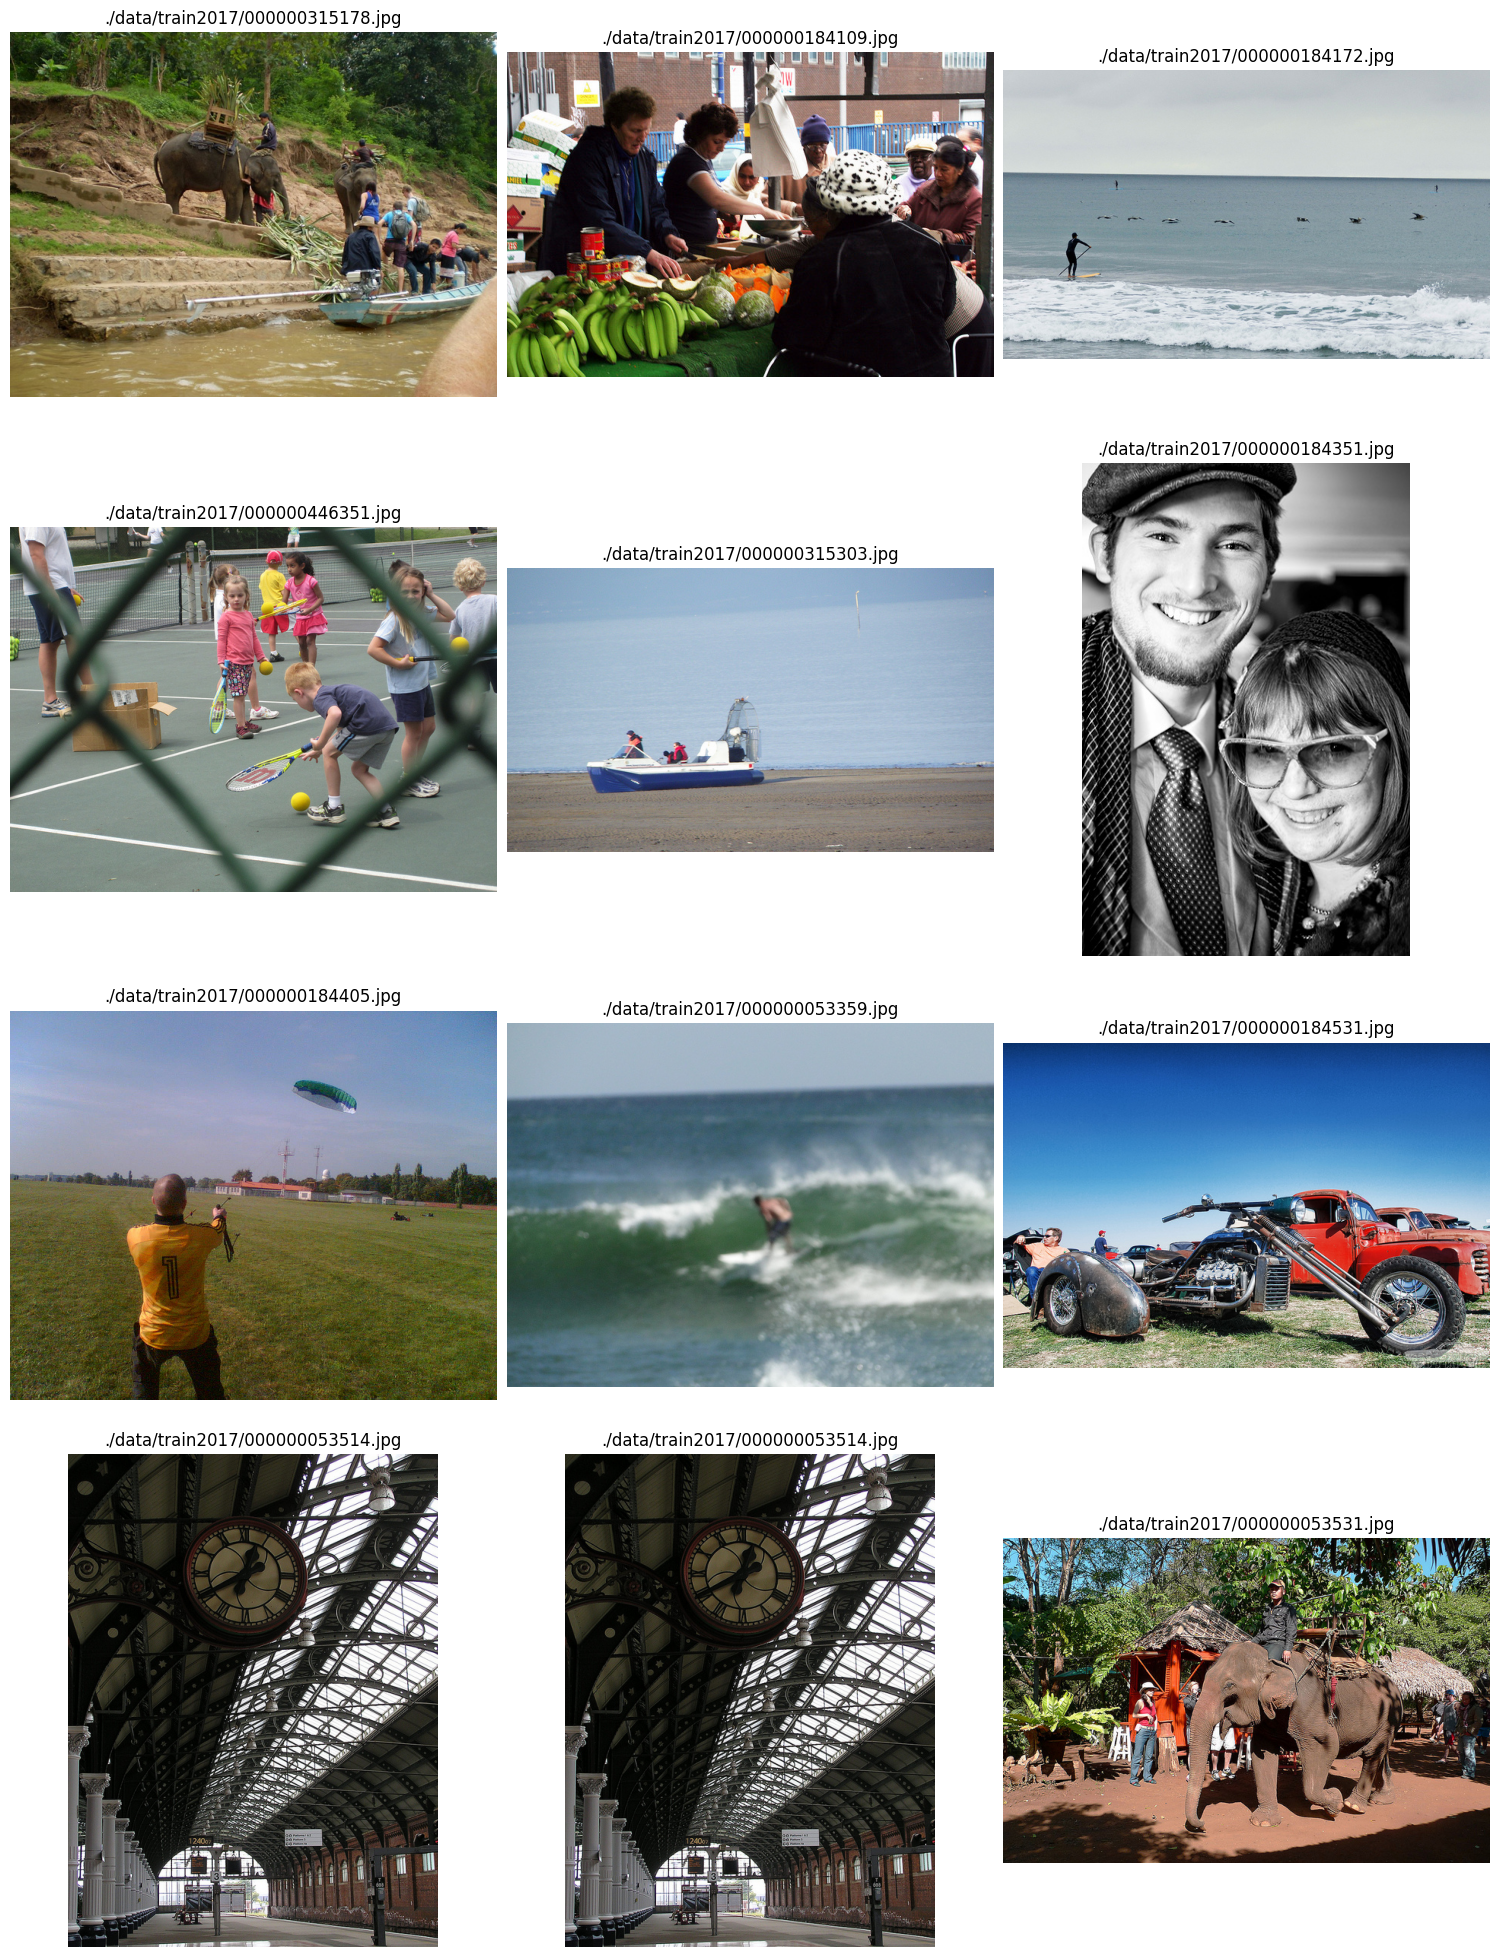

In [170]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
img_paths = next(path_gen)
for x, ax in zip(img_paths, axs.flatten()):
    img = np.asarray(Image.open(x))
    print(x)
    ax.axis('off')
    ax.set_title(x)
    ax.imshow(img)
fig.tight_layout(pad=.75)
plt.show()

In [43]:
img_caps = group_anns(caps)
len(img_caps)

2049

In [ ]:
search_terms = ['person', 'horse', 'airplane']

In [48]:
img_search = COCO_Image_Search()

loading annotations into memory...
Done (t=7.57s)
creating index...
index created!
loading annotations into memory...
Done (t=0.45s)
creating index...
index created!


In [70]:
img_search.coco.cats

{1: {'supercategory': 'person', 'id': 1, 'name': 'person'},
 2: {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 3: {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 4: {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 5: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 6: {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 7: {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 8: {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 9: {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 10: {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 11: {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 13: {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 14: {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 15: {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 16: {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 17: {'supercategory': 'animal', 'id': 17, 'name': 'cat'},

In [152]:
categories = []
r_pattern = ['vampire']
images = img_search.cat_search(categories).caption_contains(r_pattern).get_results()
print(len(img_search.img_ids))
print(images)

vampire
0
[
  [
  [0]='./data/train2017/000000208086.jpg'
  [1]='./data/train2017/000000354559.jpg'
  [2]='./data/train2017/000000428975.jpg'
  ]
] <type=COCO_Image_Search, batches=1, images=3]>


./data/train2017/000000208086.jpg
./data/train2017/000000354559.jpg
./data/train2017/000000428975.jpg


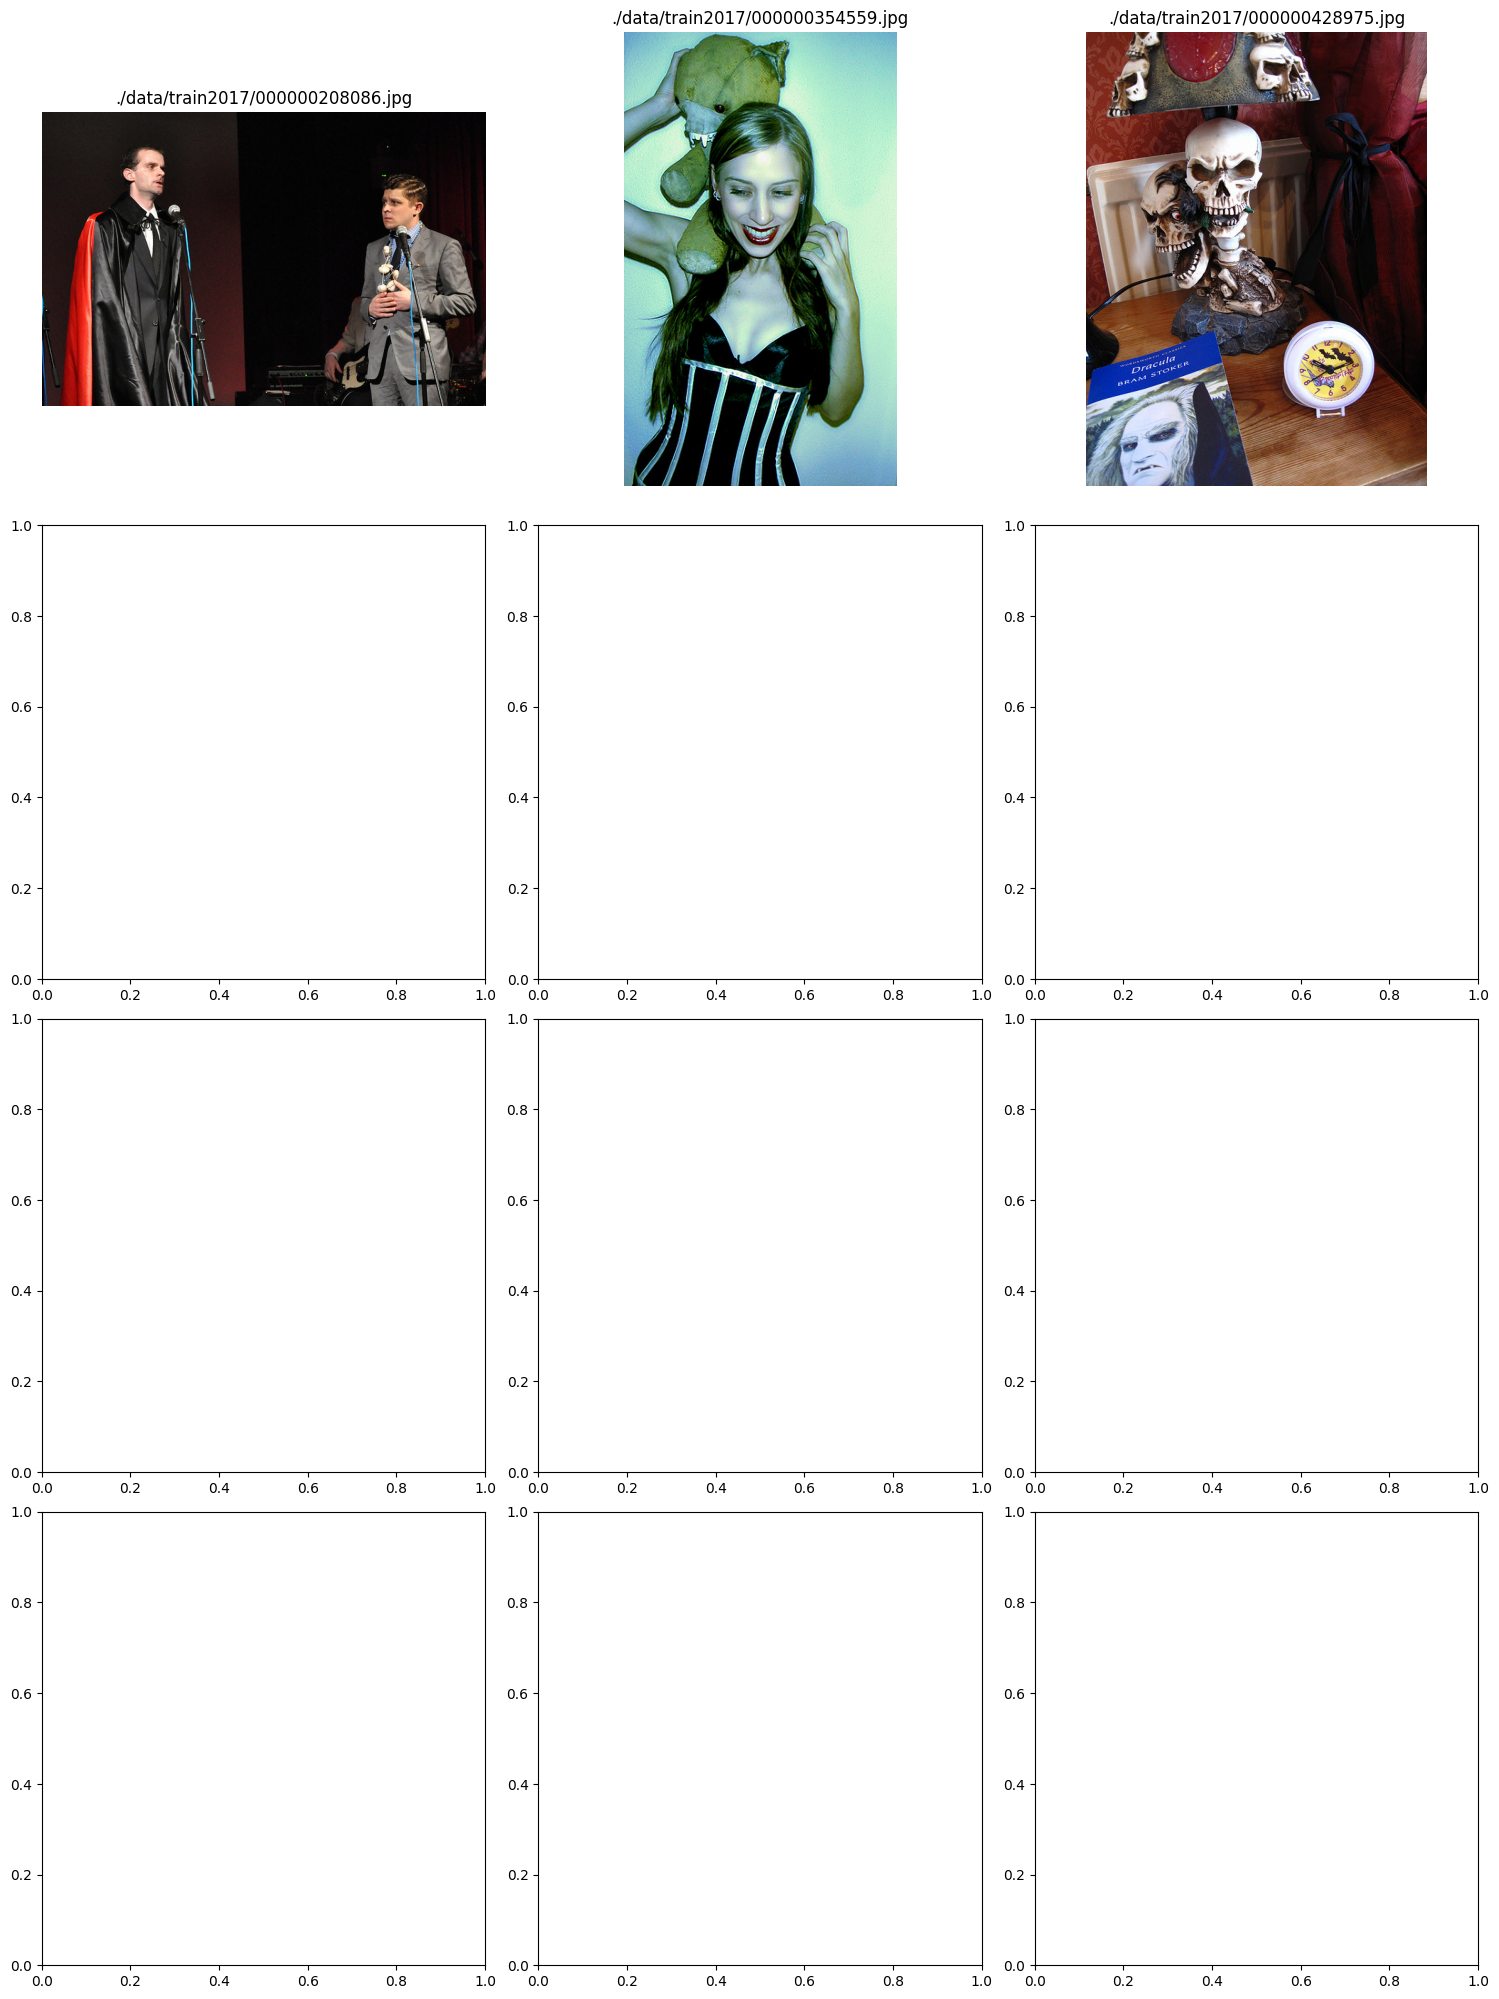

12 of 3 images


In [153]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
img_paths = next(images)
for x, ax in zip(img_paths, axs.flatten()):
    img = np.asarray(Image.open(x))
    print(x)
    ax.axis('off')
    ax.set_title(x)
    ax.imshow(img)
fig.tight_layout(pad=.75)
plt.show()
print(f"{images.cursor * images.batch_size} of {images.units} images")

'48 of 53 images'

In [133]:
for i in range(100):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
